### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [368]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [369]:
data = pd.read_csv('data/coupons.csv')

In [370]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [371]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [372]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [373]:
data.shape

(12684, 26)

In [374]:
data.sample(50)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9949,No Urgent Place,Friend(s),Rainy,55,10PM,Restaurant(20-50),2h,Male,31,Single,...,never,1~3,1~3,1~3,1,1,0,0,1,1
7662,Work,Alone,Sunny,80,7AM,Restaurant(<20),1d,Male,50plus,Married partner,...,never,4~8,4~8,never,1,0,0,1,0,1
11304,No Urgent Place,Friend(s),Snowy,30,2PM,Restaurant(<20),1d,Male,36,Unmarried partner,...,1~3,gt8,gt8,1~3,1,0,0,0,1,1
4899,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),1d,Female,31,Married partner,...,1~3,4~8,4~8,never,1,1,0,0,1,1
6969,Home,Partner,Sunny,80,6PM,Coffee House,1d,Female,31,Married partner,...,less1,gt8,4~8,less1,1,0,0,1,0,1
3782,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,26,Single,...,1~3,1~3,1~3,less1,1,0,0,0,1,1
8295,Work,Alone,Snowy,30,7AM,Restaurant(<20),2h,Male,21,Single,...,less1,1~3,less1,less1,1,1,1,0,1,1
3251,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Married partner,...,less1,1~3,less1,less1,1,0,0,0,1,1
8611,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,1d,Female,50plus,Married partner,...,4~8,NaN,4~8,4~8,1,0,0,0,1,0
7073,No Urgent Place,Partner,Rainy,55,10AM,Carry out & Take away,2h,Male,26,Married partner,...,less1,1~3,1~3,less1,1,0,0,0,1,1


In [375]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [376]:
null_values = data[data.columns.tolist()].isnull().sum().to_frame().reset_index().rename(columns={0:'null_values'})
null_values

,index,null_values
0,destination,0
1,passanger,0
2,weather,0
3,temperature,0
4,time,0
5,coupon,0
6,expiration,0
7,gender,0
8,age,0
9,maritalStatus,0


In [377]:
# data = data.convert_dtypes()

In [378]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [379]:
data.isnull().any()

destination             False
passanger               False
weather                 False
temperature             False
time                    False
coupon                  False
expiration              False
gender                  False
age                     False
maritalStatus           False
has_children            False
education               False
occupation              False
income                  False
car                      True
Bar                      True
CoffeeHouse              True
CarryAway                True
RestaurantLessThan20     True
Restaurant20To50         True
toCoupon_GEQ5min        False
toCoupon_GEQ15min       False
toCoupon_GEQ25min       False
direction_same          False
direction_opp           False
Y                       False
dtype: bool

In [380]:
# pip install missingno
# import missingno as msno
# msno.bar(data)

In [381]:
data = data[data.columns.tolist()].apply(lambda x: x.replace("'", "", regex=True))
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [382]:
data.sample(50)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
5406,Home,Alone,Sunny,80,10PM,Restaurant(<20),2h,Female,26,Unmarried partner,...,1~3,1~3,1~3,1~3,1,0,0,1,0,1
10287,Home,Alone,Sunny,80,10PM,Restaurant(20-50),1d,Female,50plus,Single,...,less1,4~8,1~3,less1,1,1,0,0,1,1
8542,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,1d,Female,36,Unmarried partner,...,never,gt8,gt8,1~3,1,0,0,0,1,1
9809,Work,Alone,Sunny,80,7AM,Coffee House,1d,Male,46,Married partner,...,less1,4~8,1~3,less1,1,0,0,1,0,1
3955,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Single,...,1~3,gt8,1~3,1~3,1,0,0,0,1,1
5846,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Female,50plus,Single,...,4~8,4~8,4~8,1~3,1,1,0,0,1,0
8678,No Urgent Place,Friend(s),Sunny,30,10PM,Restaurant(<20),2h,Male,26,Single,...,1~3,less1,1~3,less1,1,0,0,0,1,1
3444,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,26,Single,...,less1,1~3,4~8,1~3,1,1,0,0,1,1
8164,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Female,46,Unmarried partner,...,less1,less1,1~3,less1,1,1,1,0,1,0
6594,Home,Kid(s),Snowy,30,10PM,Restaurant(20-50),2h,Male,36,Married partner,...,NaN,less1,less1,never,1,1,0,0,1,0


In [383]:
car_diff = data["car"].value_counts()
car_diff

Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64

In [384]:
bar_diff = data["Bar"].value_counts()
bar_diff

never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

In [385]:
coffee_house_diff = data["CoffeeHouse"].value_counts()
coffee_house_diff

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64

<Axes: >

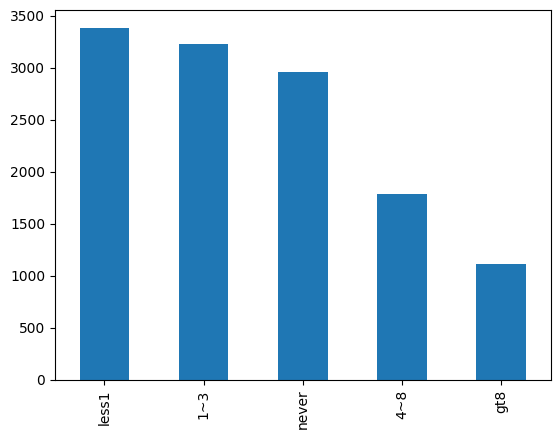

In [386]:
data["CoffeeHouse"].value_counts().plot(kind='bar')

<Axes: >

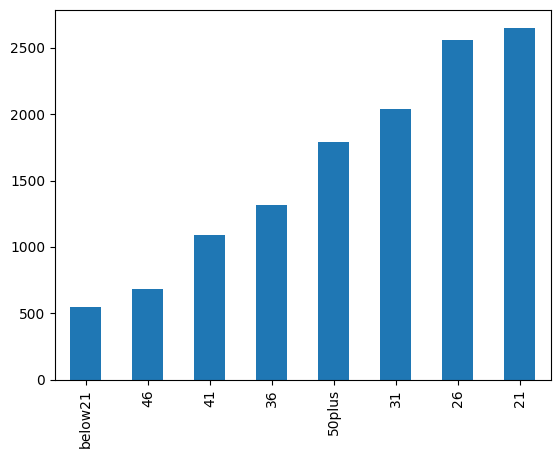

In [387]:
data["age"].value_counts().sort_values().plot(kind='bar')

<Axes: >

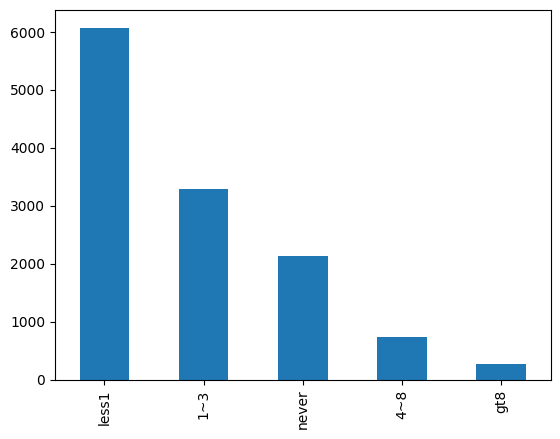

In [388]:
data["Restaurant20To50"].value_counts().plot(kind='bar')


3. Decide what to do about your missing data -- drop, replace, other...

In [389]:
# Drop the 'car' column; it is not documented and contains many null entries
drop_car_column = data.drop(axis=1, columns='car')
drop_car_column


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [390]:
for columns_drop_na in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
  drop_car_column[columns_drop_na] = drop_car_column[columns_drop_na].fillna('never')
  print(str.format("Column {} replace null values with 'never', which total rows now is equal to={} which should match overall rows on dataframe={}", columns_drop_na, drop_car_column[columns_drop_na].value_counts().sum(), len(drop_car_column)))

Column Bar replace null values with 'never', which total rows now is equal to=12684 which should match overall rows on dataframe=12684
Column CoffeeHouse replace null values with 'never', which total rows now is equal to=12684 which should match overall rows on dataframe=12684
Column CarryAway replace null values with 'never', which total rows now is equal to=12684 which should match overall rows on dataframe=12684
Column RestaurantLessThan20 replace null values with 'never', which total rows now is equal to=12684 which should match overall rows on dataframe=12684
Column Restaurant20To50 replace null values with 'never', which total rows now is equal to=12684 which should match overall rows on dataframe=12684


In [391]:
drop_car_column_fix_nullness = drop_car_column

In [392]:
# Now discard the rest of the nulls, just making sure we do not have nulls anymore
drop_na_all_data = data.dropna()
drop_na_all_data


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1237,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,1
1238,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,0
1239,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,1
1240,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,26,Single,...,4~8,4~8,1~3,never,1,1,0,0,1,0
1241,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8293,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Male,21,Single,...,less1,1~3,less1,less1,1,1,1,0,1,1
8294,Work,Alone,Rainy,55,7AM,Restaurant(20-50),1d,Male,21,Single,...,less1,1~3,less1,less1,1,1,1,0,1,1
8295,Work,Alone,Snowy,30,7AM,Restaurant(<20),2h,Male,21,Single,...,less1,1~3,less1,less1,1,1,1,0,1,1
8296,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Male,21,Single,...,less1,1~3,less1,less1,1,1,1,0,1,1


In [393]:
print("After replacing nulls with 'never' in the selected columns, we have discarded ", (len(data) - len(drop_car_column_fix_nullness)), " rows")

After replacing nulls with 'never' in the selected columns, we have discarded  0  rows


In [394]:
## also here we need to convert age to numerical values
## prefer instead to drop the rows which have non-numeric values and hard to guess what the value will be
# drop_car_column_fix_nullness.drop(drop_car_column_fix_nullness[(drop_car_column_fix_nullness['age'] > '50plus') & (drop_car_column_fix_nullness['age'] == 'below21')].index, inplace=True)
# drop_car_column_fix_nullness['age'] = pd.to_numeric(drop_car_column_fix_nullness['age'], errors='coerce')
# drop_car_column_fix_nullness.age.value_counts()

## decide to include the age as part of my analysis, will play as string

4. What proportion of the total observations chose to accept the coupon? 



In [395]:
drop_car_column_fix_nullness.query('Y == 1')['Y'].sum() / (drop_car_column_fix_nullness.Y.value_counts().sum())

0.5684326710816777

<Axes: title={'center': 'Coupon acceptance ratio'}>

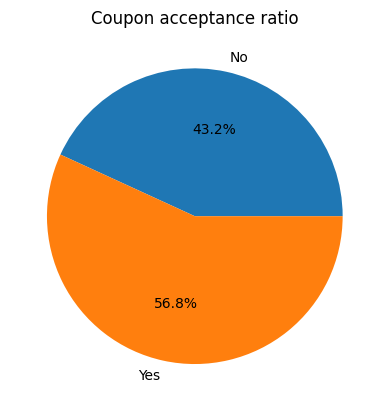

In [396]:
drop_car_column_fix_nullness.groupby("Y").size().plot.pie(autopct="%1.1f%%", title="Coupon acceptance ratio", labels=["No", "Yes"])

5. Use a bar plot to visualize the `coupon` column.

<Axes: title={'center': 'Number of coupons by types'}, xlabel='coupon'>

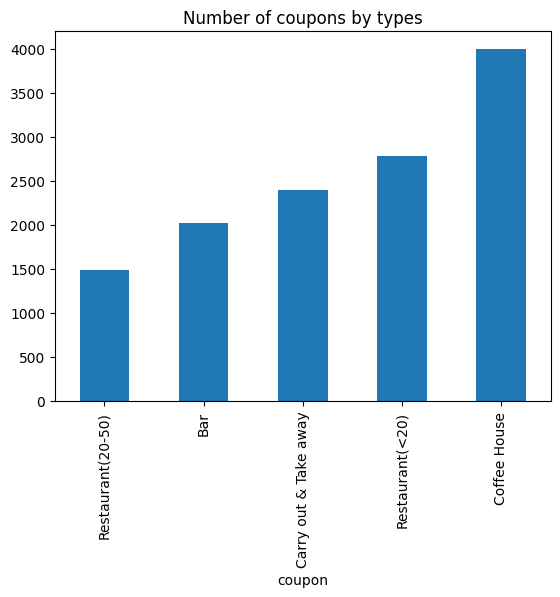

In [410]:
# drop_car_column_fix_nullness["coupon"].value_counts().sort_values().plot(kind='bar')
drop_car_column_fix_nullness.groupby("coupon").size().sort_values(ascending=True).plot.bar(title="Number of coupons by types")


6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

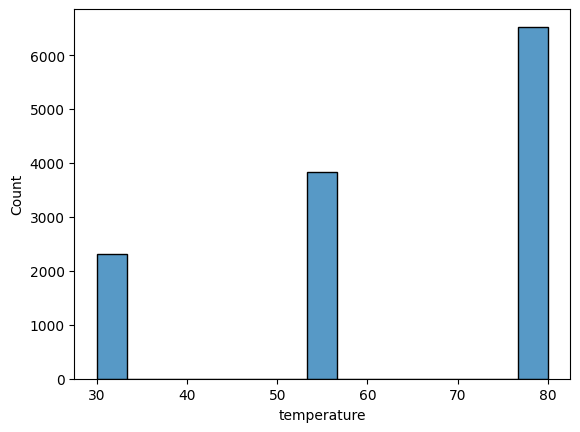

In [399]:
sns.histplot(drop_car_column_fix_nullness, x="temperature", multiple="stack", bins=15)


<Axes: xlabel='temperature', ylabel='Count'>

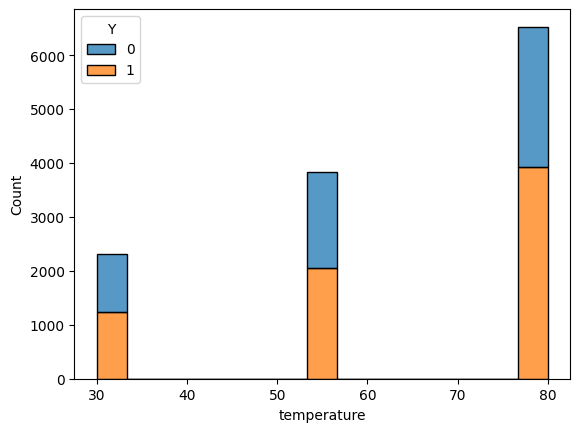

In [400]:
sns.histplot(drop_car_column_fix_nullness, x="temperature", hue="Y", multiple="stack", bins=15)


(array([2316.,    0.,    0.,    0.,    0.,    0.,    0., 3840.,    0.,
           0.,    0.,    0.,    0.,    0., 6528.]),
 array([30.        , 33.33333333, 36.66666667, 40.        , 43.33333333,
        46.66666667, 50.        , 53.33333333, 56.66666667, 60.        ,
        63.33333333, 66.66666667, 70.        , 73.33333333, 76.66666667,
        80.        ]),
 <BarContainer object of 15 artists>)

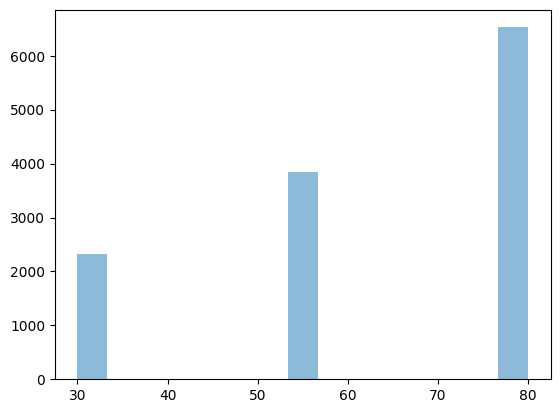

In [401]:
plt.hist(drop_car_column_fix_nullness["temperature"], bins=15, alpha=0.5, label='temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [402]:
# drop_car_column_fix_nullness.groupby("coupon").size().sort_values(ascending=True).plot.bar(title="Number of coupons by types")
dfBarCoupons = drop_car_column_fix_nullness.query("coupon == 'Bar'")
dfBarCoupons

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


<Axes: title={'center': 'Bar coupon acceptance ratio'}>

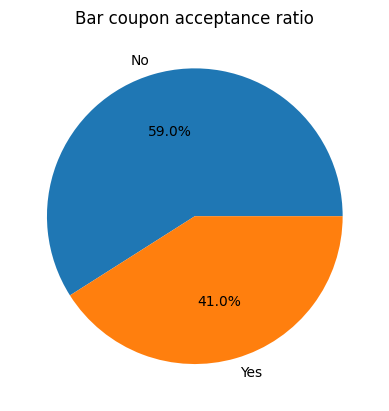

In [403]:
(dfBarCoupons.groupby("Y").size()/dfBarCoupons["Y"].value_counts().sum()).plot.pie(autopct="%1.1f%%", labels=["No","Yes"], title="Bar coupon acceptance ratio")

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


<Axes: title={'center': 'Bar coupon acceptance ratio for 3 or less visits'}>

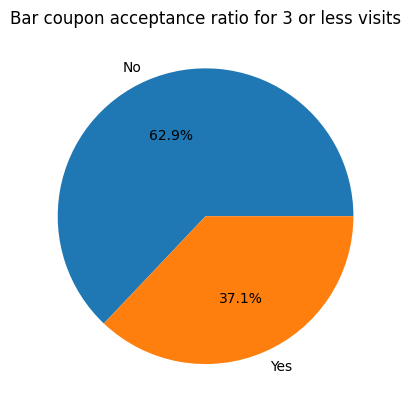

In [404]:
# dfBarCoupons["Bar"].value_counts().sort_values()
BarVisit3OrLess = ["never", "less1","1~3"]
BarVisitMoreThan3 = ["4~8", "gt8"]
dfBarCoupons.query("Bar in @BarVisit3OrLess").groupby("Y").size().plot.pie(autopct="%1.1f%%", labels=["No","Yes"], title="Bar coupon acceptance ratio for 3 or less visits")

<Axes: title={'center': 'Bar coupon acceptance ratio for more than 3 visits'}>

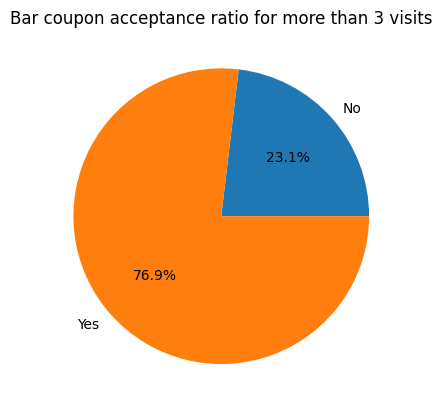

In [405]:
dfBarCoupons.query("Bar in @BarVisitMoreThan3").groupby("Y").size().plot.pie(autopct="%1.1f%%", labels=["No","Yes"], title="Bar coupon acceptance ratio for more than 3 visits")

In [406]:
print("Acceptance Rate for 3 or fewer times is: ", dfBarCoupons.query("Bar in @BarVisit3OrLess and Y == 1")["Y"].value_counts().sum() / dfBarCoupons.query("Bar in @BarVisit3OrLess")["Y"].value_counts().sum())
print("Acceptance Rate for More than 3 times is: ", dfBarCoupons.query("Bar in @BarVisitMoreThan3 and Y == 1")["Y"].value_counts().sum() / dfBarCoupons.query("Bar in @BarVisitMoreThan3")["Y"].value_counts().sum())


Acceptance Rate for 3 or fewer times is:  0.37073707370737075
Acceptance Rate for More than 3 times is:  0.7688442211055276


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


<Axes: title={'center': 'Bar coupon acceptance ratio for more than once a month and age over the 25'}>

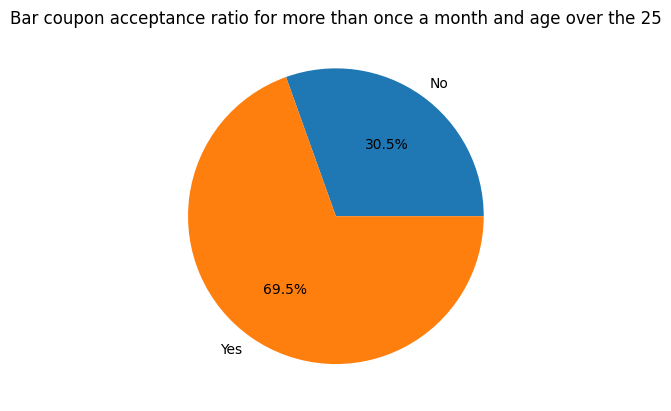

In [407]:
BarVisitMoreThanOnceMonth = ["1~3", "4~8", "gt8"]
CustomerOlderThan25 = ["26", "31", "36", "41", "46", "50plus"]
dfBarCoupons.query("Bar in @BarVisitMoreThanOnceMonth & age in @CustomerOlderThan25").groupby("Y").size().plot.pie(autopct="%1.1f%%", labels=["No","Yes"], title="Bar coupon acceptance ratio for more than once a month and age over the 25")

<Axes: title={'center': 'Bar coupon acceptance ratio for less than once a month and age below 25'}>

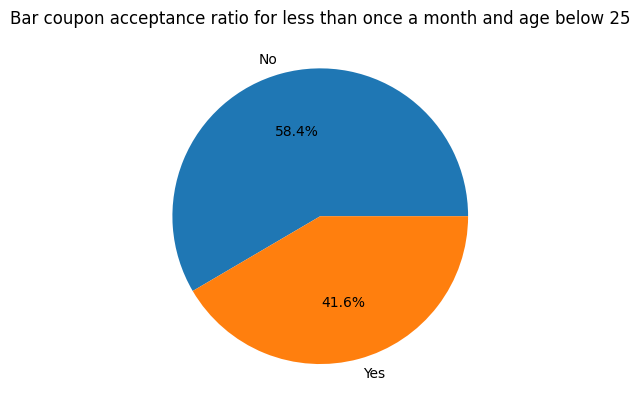

In [408]:
BarVisitLessMonth = ["never", "less1"]
CustomerYoungerThan25 = ["below21"]
dfBarCoupons.query("Bar in @BarVisitLessMonth & age in @CustomerYoungerThan25").groupby("Y").size().plot.pie(autopct="%1.1f%%", labels=["No","Yes"], title="Bar coupon acceptance ratio for less than once a month and age below 25")


<Axes: title={'center': 'Bar coupon acceptance ratio for age below 25'}>

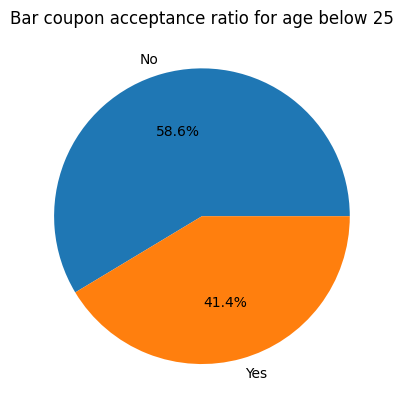

In [409]:
dfBarCoupons.query("age in @CustomerYoungerThan25").groupby("Y").size().plot.pie(autopct="%1.1f%%", labels=["No","Yes"], title="Bar coupon acceptance ratio for age below 25")

The difference between 69.5 % and 41 % between the acceptance rate of the coupon is significant, which means that the age of the customer is a factor in the acceptance of the coupon.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


<Axes: title={'center': 'Bar coupon acceptance ratio for more than once a month and not a kid or farmer'}>

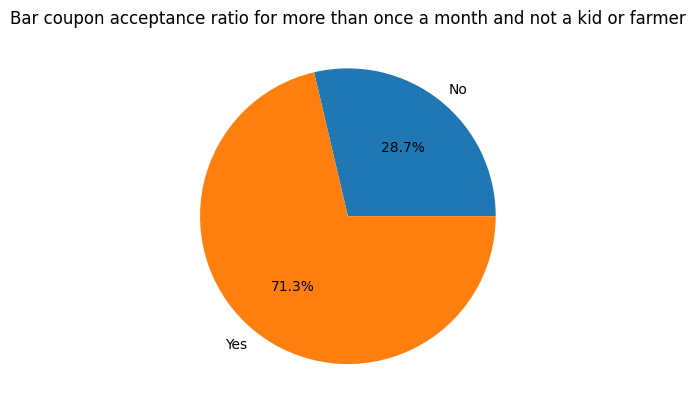

In [440]:
BarVisitMoreThanOnceMonth = ["1~3", "4~8", "gt8"]
PassangerKid = ["Kid(s)"]
OccupationFarmingFishingForestry = ["Farming Fishing & Forestry"]
dfBarCoupons.query("Bar in @BarVisitMoreThanOnceMonth & passanger not in @PassangerKid & occupation not in @OccupationFarmingFishingForestry").groupby("Y").size().plot.pie(autopct="%1.1f%%", labels=["No","Yes"], title="Bar coupon acceptance ratio for more than once a month and not a kid or farmer")

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



<Axes: title={'center': 'Bar coupon acceptance ratio for more than once a month and passanger not kid and marital status is not widow'}>

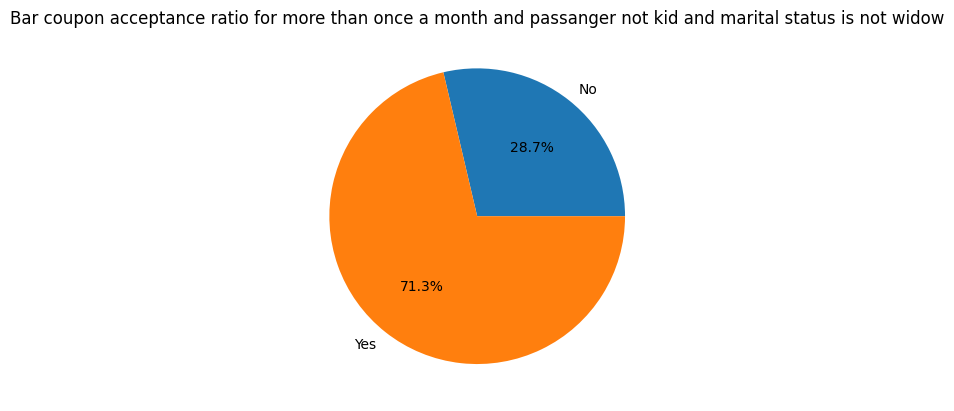

In [467]:
BarVisitMoreThanOnceMonth = ["1~3", "4~8", "gt8"]
PassangersKids = ["Kid(s)"]
MaritalStatusWidow = ["Widowed"]
AgeUnder30 = ["below21", "21", "26"]
CheapRestaurant = ["Restaurant(<20)"]
CheapRestaurantVisitMoreThan4TimesPerMonth = ["4~8", "gt8"]
dfBarCoupons.query("Bar in @BarVisitMoreThanOnceMonth & passanger not in @PassangersKids & maritalStatus not in @MaritalStatusWidow").groupby("Y").size().plot.pie(autopct="%1.1f%%", labels=["No","Yes"], title="Bar coupon acceptance ratio for more than once a month and passanger not kid and marital status is not widow")


<Axes: title={'center': 'Bar coupon acceptance ratio for more than once a month and age under 30'}>

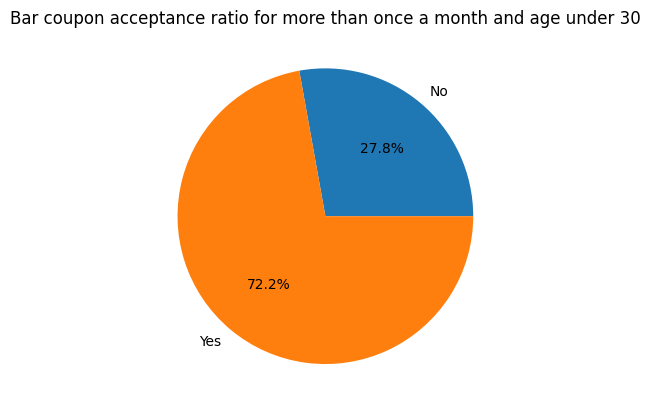

In [443]:
dfBarCoupons.query("Bar in @BarVisitMoreThanOnceMonth & age in @AgeUnder30").groupby("Y").size().plot.pie(autopct="%1.1f%%", labels=["No","Yes"], title="Bar coupon acceptance ratio for more than once a month and age under 30")


<Axes: title={'center': 'Bar coupon acceptance ratio for cheap restaurant and visit more than 4 times per month'}>

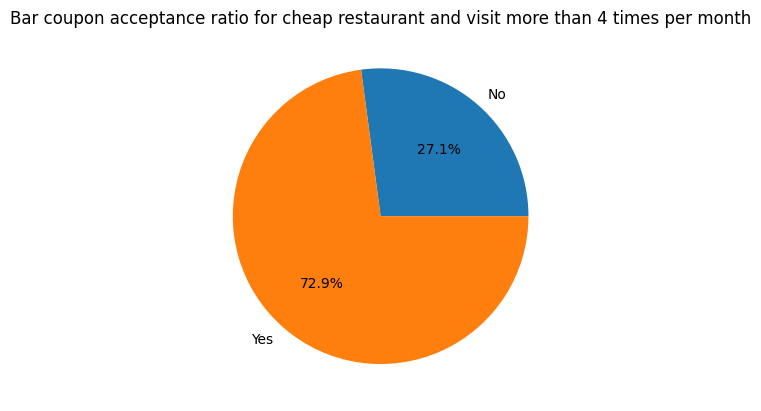

In [470]:
drop_car_column_fix_nullness.query("coupon in @CheapRestaurant & RestaurantLessThan20 in @CheapRestaurantVisitMoreThan4TimesPerMonth").groupby("Y").size().plot.pie(autopct="%1.1f%%", labels=["No","Yes"], title="Bar coupon acceptance ratio for cheap restaurant and visit more than 4 times per month")

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  